In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

C:\Users\sclab2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
ap_data = pd.read_excel("exact_data_2.xlsx")
ap_data = ap_data.drop('datetime',axis = 1)

In [4]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 2 columns):
date       673 non-null datetime64[ns]
all_num    673 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.6 KB


In [5]:
ap_data.reset_index(inplace=True, drop=True)
ap_data.head(-1)

,date,all_num
0,2019-09-20 00:00:00,1
1,2019-09-20 01:00:00,0
2,2019-09-20 02:00:00,0
3,2019-09-20 03:00:00,0
4,2019-09-20 04:00:00,0
5,2019-09-20 05:00:00,0
6,2019-09-20 06:00:00,0
7,2019-09-20 07:00:00,4
8,2019-09-20 08:00:00,10
9,2019-09-20 09:00:00,18


In [6]:
air_data = pd.read_excel(r"air_data\air92017.xlsx")

In [7]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 8 columns):
timestamp(Asia/Seoul)    673 non-null datetime64[ns]
temp(°C)                 673 non-null float64
humid                    673 non-null float64
co2                      673 non-null float64
voc                      673 non-null float64
pm25                     673 non-null float64
light                    673 non-null float64
noise                    673 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 42.1 KB


In [8]:
air_data.reset_index(inplace=True, drop=True)
air_data

,timestamp(Asia/Seoul),temp(°C),humid,co2,voc,pm25,light,noise
0,2019-09-20 00:00:00,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000
1,2019-09-20 01:00:00,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875
2,2019-09-20 02:00:00,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750
3,2019-09-20 03:00:00,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000
4,2019-09-20 04:00:00,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250
5,2019-09-20 05:00:00,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500
6,2019-09-20 06:00:00,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000
7,2019-09-20 07:00:00,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125
8,2019-09-20 08:00:00,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750
9,2019-09-20 09:00:00,24.9625,51.4750,682.5250,101.7875,5.2250,470.1000,52.7000


In [9]:
#파일 불러오기
real_air = pd.read_csv('광주1020.csv', engine='python')

In [10]:
real_air

,지점,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,156,2019-09-19 01:00,16.8,NaN,2.1,57
1,156,2019-09-19 02:00,15.6,NaN,1.7,61
2,156,2019-09-19 03:00,16.0,NaN,2.7,58
3,156,2019-09-19 04:00,14.9,NaN,1.6,65
4,156,2019-09-19 05:00,14.8,NaN,1.6,71
5,156,2019-09-19 06:00,15.1,NaN,0.7,69
6,156,2019-09-19 07:00,15.0,NaN,0.5,74
7,156,2019-09-19 08:00,16.2,NaN,0.0,69
8,156,2019-09-19 09:00,18.8,NaN,0.6,55
9,156,2019-09-19 10:00,21.2,NaN,1.1,56


In [11]:
real_air = real_air[23:696]

In [12]:
real_air.reset_index(inplace=True, drop=True)
real_air = real_air[['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']]

In [13]:
real_air

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2019-09-20 00:00,18.8,NaN,1.5,73
1,2019-09-20 01:00,19.1,NaN,0.2,72
2,2019-09-20 02:00,17.8,NaN,0.2,85
3,2019-09-20 03:00,17.5,NaN,0.1,87
4,2019-09-20 04:00,17.3,NaN,0.0,86
5,2019-09-20 05:00,17.6,NaN,1.4,83
6,2019-09-20 06:00,17.9,NaN,2.2,80
7,2019-09-20 07:00,17.3,NaN,0.9,84
8,2019-09-20 08:00,18.2,NaN,1.1,82
9,2019-09-20 09:00,19.4,NaN,2.5,73


In [14]:
result = pd.concat([ap_data,air_data,real_air], axis = 1)

In [15]:
result = result.drop(['일시', 'timestamp(Asia/Seoul)'], axis = 1)

In [16]:
result

,date,all_num,temp(°C),humid,co2,voc,pm25,light,noise,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2019-09-20 00:00:00,1,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,18.8,NaN,1.5,73
1,2019-09-20 01:00:00,0,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,19.1,NaN,0.2,72
2,2019-09-20 02:00:00,0,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,17.8,NaN,0.2,85
3,2019-09-20 03:00:00,0,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,17.5,NaN,0.1,87
4,2019-09-20 04:00:00,0,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,17.3,NaN,0.0,86
5,2019-09-20 05:00:00,0,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,17.6,NaN,1.4,83
6,2019-09-20 06:00:00,0,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,17.9,NaN,2.2,80
7,2019-09-20 07:00:00,4,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,17.3,NaN,0.9,84
8,2019-09-20 08:00:00,10,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,18.2,NaN,1.1,82
9,2019-09-20 09:00:00,18,24.9625,51.4750,682.5250,101.7875,5.2250,470.1000,52.7000,19.4,NaN,2.5,73


In [17]:
result['date_day'] = result['date'].dt.day
result['date_hour'] = result['date'].dt.hour
result['date_weekday'] = result['date'].dt.dayofweek

In [18]:
result = result.set_index('date')

In [19]:
result

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,기온(°C),강수량(mm),풍속(m/s),습도(%),date_day,date_hour,date_weekday
date,,,,,,,,,,,,,,,
2019-09-20 00:00:00,1,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,18.8,NaN,1.5,73,20,0,4
2019-09-20 01:00:00,0,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,19.1,NaN,0.2,72,20,1,4
2019-09-20 02:00:00,0,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,17.8,NaN,0.2,85,20,2,4
2019-09-20 03:00:00,0,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,17.5,NaN,0.1,87,20,3,4
2019-09-20 04:00:00,0,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,17.3,NaN,0.0,86,20,4,4
2019-09-20 05:00:00,0,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,17.6,NaN,1.4,83,20,5,4
2019-09-20 06:00:00,0,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,17.9,NaN,2.2,80,20,6,4
2019-09-20 07:00:00,4,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,17.3,NaN,0.9,84,20,7,4
2019-09-20 08:00:00,10,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,18.2,NaN,1.1,82,20,8,4


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 673 entries, 2019-09-20 00:00:00 to 2019-10-18 00:00:00
Data columns (total 15 columns):
all_num         673 non-null int64
temp(°C)        673 non-null float64
humid           673 non-null float64
co2             673 non-null float64
voc             673 non-null float64
pm25            673 non-null float64
light           673 non-null float64
noise           673 non-null float64
기온(°C)          673 non-null float64
강수량(mm)         109 non-null float64
풍속(m/s)         673 non-null float64
습도(%)           673 non-null int64
date_day        673 non-null int64
date_hour       673 non-null int64
date_weekday    673 non-null int64
dtypes: float64(10), int64(5)
memory usage: 84.1 KB


In [21]:
result = result.fillna(0)
result = result[:-1]
result.shape
type(result)

pandas.core.frame.DataFrame

In [22]:
result.corr()

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,기온(°C),강수량(mm),풍속(m/s),습도(%),date_day,date_hour,date_weekday
all_num,1.000000,0.309482,-0.117301,0.263717,0.270489,0.095889,0.568071,0.238668,0.377009,-0.023801,0.016887,-0.505930,-7.440479e-02,6.454492e-01,-0.121625
temp(°C),0.309482,1.000000,0.565587,0.285862,0.322774,0.195322,0.303469,0.952160,0.329193,-0.012350,0.076490,-0.178920,4.726016e-03,1.550220e-01,0.059514
humid,-0.117301,0.565587,1.000000,0.134903,0.167718,0.073550,-0.022227,0.680564,0.108011,0.227686,0.193281,0.499887,8.966493e-02,-7.897152e-02,0.034359
co2,0.263717,0.285862,0.134903,1.000000,0.923508,-0.156296,0.052115,0.226730,0.447496,0.002175,-0.086458,0.136542,5.433804e-04,4.091110e-01,-0.006683
voc,0.270489,0.322774,0.167718,0.923508,1.000000,0.012600,0.056296,0.245999,0.390445,-0.017326,-0.155305,0.119805,6.986506e-02,4.141231e-01,-0.039811
pm25,0.095889,0.195322,0.073550,-0.156296,0.012600,1.000000,0.014536,0.166950,-0.010137,-0.243171,-0.351776,-0.038659,1.482130e-01,-2.727670e-02,-0.041634
light,0.568071,0.303469,-0.022227,0.052115,0.056296,0.014536,1.000000,0.300979,0.390065,-0.011851,0.078234,-0.475410,1.656925e-02,5.114431e-01,-0.023481
noise,0.238668,0.952160,0.680564,0.226730,0.245999,0.166950,0.300979,1.000000,0.214254,0.044857,0.125526,-0.052086,3.124158e-02,1.273734e-01,0.029269
기온(°C),0.377009,0.329193,0.108011,0.447496,0.390445,-0.010137,0.390065,0.214254,1.000000,-0.013768,0.072689,-0.288657,2.314811e-01,3.146656e-01,0.213014
강수량(mm),-0.023801,-0.012350,0.227686,0.002175,-0.017326,-0.243171,-0.011851,0.044857,-0.013768,1.000000,0.420835,0.290558,-1.512813e-01,2.749759e-02,0.021702


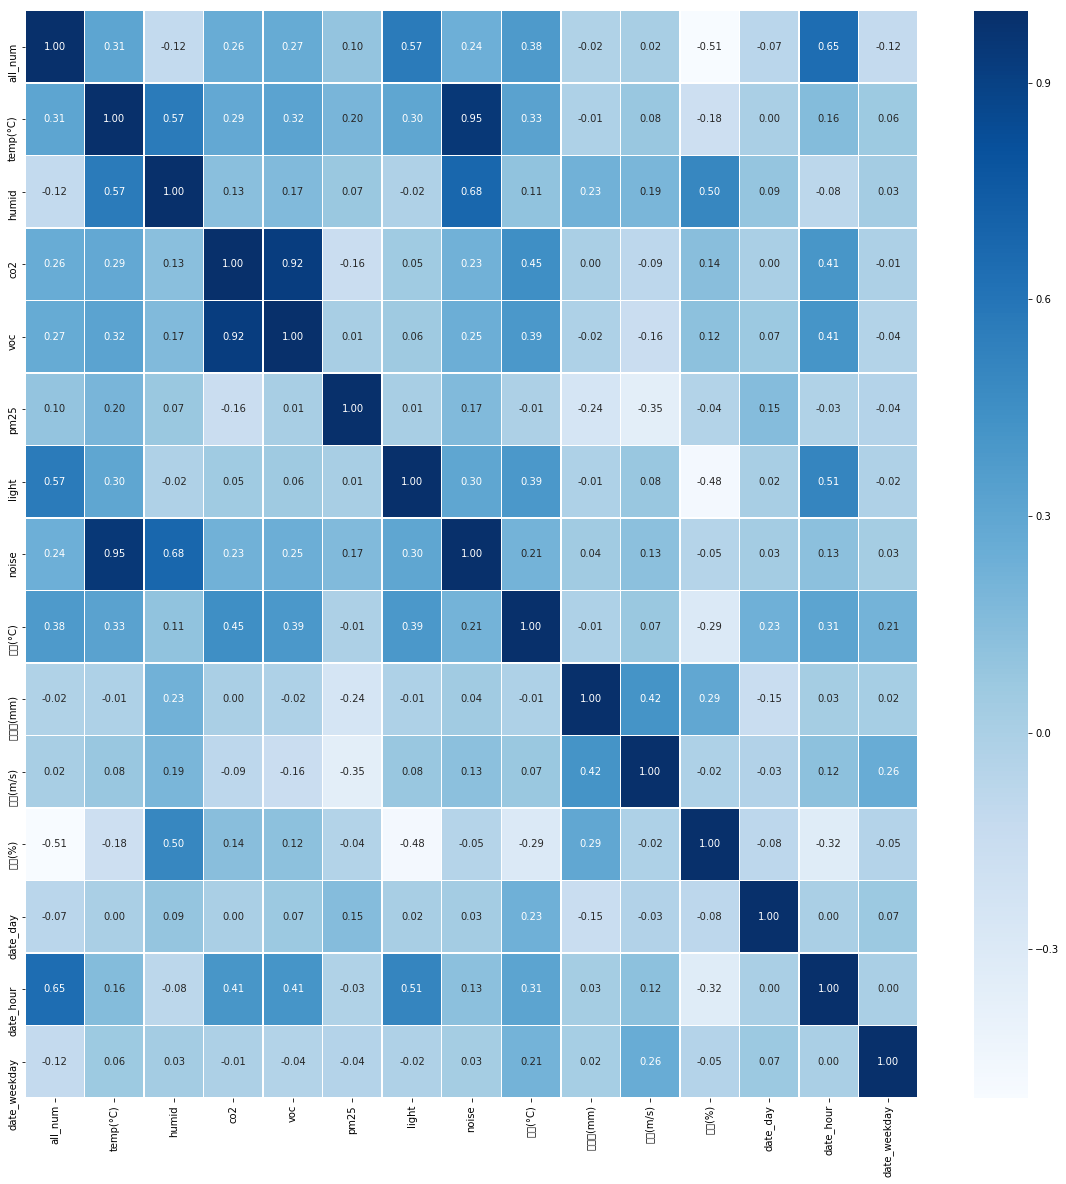

In [23]:
#https://wikidocs.net/45481
#https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
#https://gomguard.tistory.com/173

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(data = result.corr(), annot=True,
fmt = '.2f', linewidths = .5, cmap = 'Blues')

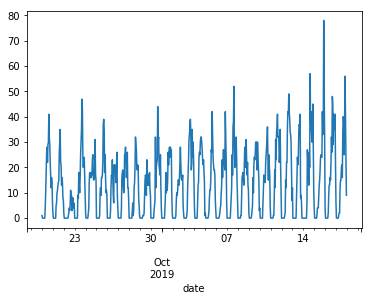

In [24]:
result['all_num']['2019-09-20' : '2019-10-18'].plot()

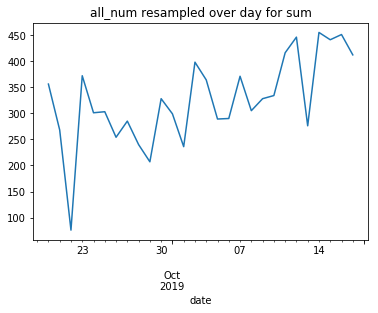

In [25]:
result.all_num.resample('D').sum().plot(title='all_num resampled over day for sum') 

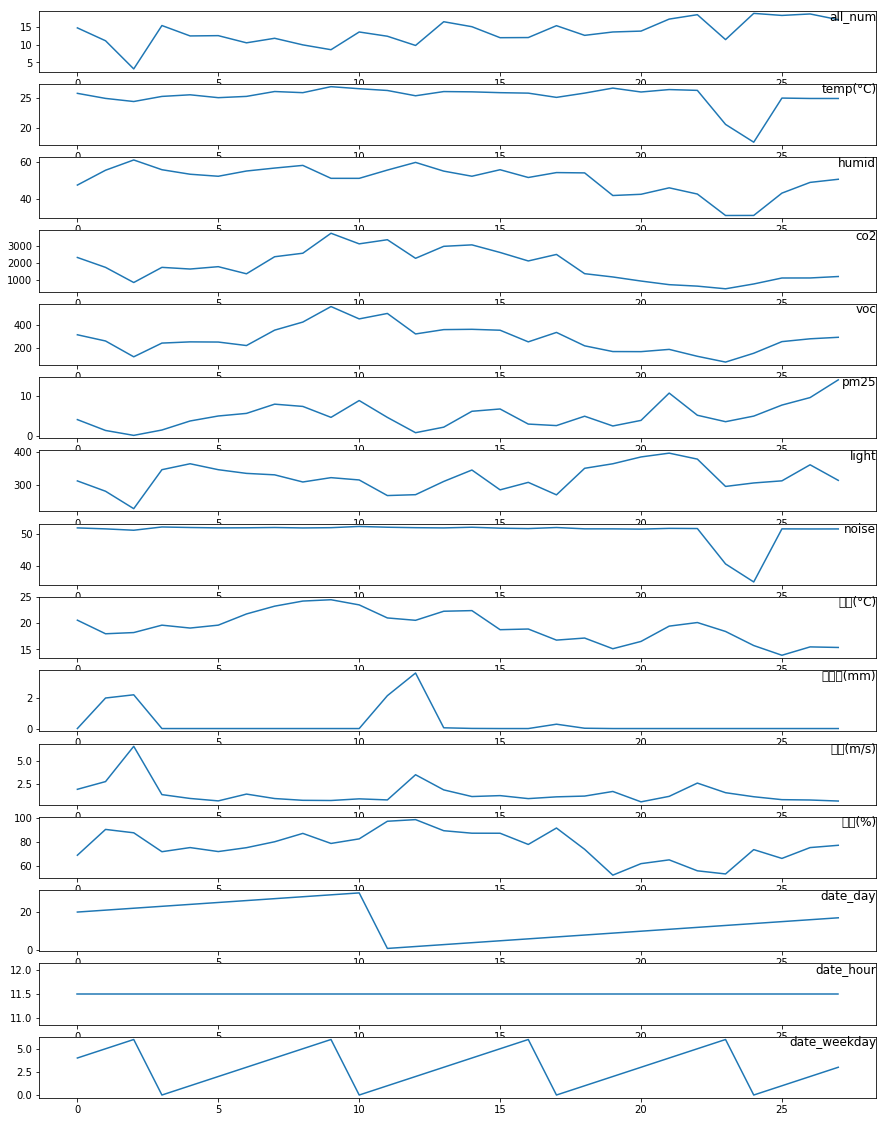

In [26]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14]
i = 1
groups=cols
values = result.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 20))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(result.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [27]:
type(result)

pandas.core.frame.DataFrame

In [28]:
result_resample = result.resample('h').mean() 
result_resample.shape

(672, 15)

In [29]:
values = result_resample.values 

In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[2, 5, 9, 10, 12, 14, 17, 20, 24, 25, 27, 29]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var4(t-1)  var5(t-1)  var7(t-1)  var8(t-1)  \
1   0.012821   0.824519   0.833640   0.568374   0.138663   0.931660   
2   0.000000   0.829327   0.739948   0.538482   0.000000   0.931427   
3   0.000000   0.834535   0.662773   0.514604   0.000000   0.931195   
4   0.000000   0.822516   0.475913   0.409014   0.175694   0.961413   
5   0.000000   0.814904   0.201730   0.212433   0.000000   0.933984   

   var9(t-1)  var12(t-1)  var14(t-1)  var1(t)   var2(t)   var4(t)   var5(t)  \
1   0.476190    0.657895    0.000000      0.0  0.829327  0.739948  0.538482   
2   0.492063    0.644737    0.043478      0.0  0.834535  0.662773  0.514604   
3   0.423280    0.815789    0.086957      0.0  0.822516  0.475913  0.409014   
4   0.407407    0.842105    0.130435      0.0  0.814904  0.201730  0.212433   
5   0.396825    0.828947    0.173913      0.0  0.818510  0.094535  0.082750   

    var7(t)   var8(t)   var9(t)  var12(t)  var14(t)  
1  0.000000  0.931427  0.492063  0.644737  0

In [32]:
reframed

,var1(t-1),var2(t-1),var4(t-1),var5(t-1),var7(t-1),var8(t-1),var9(t-1),var12(t-1),var14(t-1),var1(t),var2(t),var4(t),var5(t),var7(t),var8(t),var9(t),var12(t),var14(t)
1,0.012821,0.824519,0.833640,0.568374,0.138663,0.931660,0.476190,0.657895,0.000000,0.000000,0.829327,0.739948,0.538482,0.000000,0.931427,0.492063,0.644737,0.043478
2,0.000000,0.829327,0.739948,0.538482,0.000000,0.931427,0.492063,0.644737,0.043478,0.000000,0.834535,0.662773,0.514604,0.000000,0.931195,0.423280,0.815789,0.086957
3,0.000000,0.834535,0.662773,0.514604,0.000000,0.931195,0.423280,0.815789,0.086957,0.000000,0.822516,0.475913,0.409014,0.175694,0.961413,0.407407,0.842105,0.130435
4,0.000000,0.822516,0.475913,0.409014,0.175694,0.961413,0.407407,0.842105,0.130435,0.000000,0.814904,0.201730,0.212433,0.000000,0.933984,0.396825,0.828947,0.173913
5,0.000000,0.814904,0.201730,0.212433,0.000000,0.933984,0.396825,0.828947,0.173913,0.000000,0.818510,0.094535,0.082750,0.000000,0.936309,0.412698,0.789474,0.217391
6,0.000000,0.818510,0.094535,0.082750,0.000000,0.936309,0.412698,0.789474,0.217391,0.000000,0.808093,0.081717,0.067760,0.001063,0.948396,0.428571,0.750000,0.260870
7,0.000000,0.808093,0.081717,0.067760,0.001063,0.948396,0.428571,0.750000,0.260870,0.051282,0.793670,0.085555,0.065455,0.401006,0.961646,0.396825,0.802632,0.304348
8,0.051282,0.793670,0.085555,0.065455,0.401006,0.961646,0.396825,0.802632,0.304348,0.128205,0.805689,0.109160,0.105653,0.443954,0.970246,0.444444,0.776316,0.347826
9,0.128205,0.805689,0.109160,0.105653,0.443954,0.970246,0.444444,0.776316,0.347826,0.230769,0.800080,0.136505,0.103096,0.481561,0.980009,0.507937,0.657895,0.391304
10,0.230769,0.800080,0.136505,0.103096,0.481561,0.980009,0.507937,0.657895,0.391304,0.320513,0.844151,0.226725,0.196734,0.486939,0.965132,0.582011,0.592105,0.434783


In [86]:
values = reframed.values

n_train_time = 14*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(336, 1, 17) (336,) (335, 1, 17) (335,)


In [87]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [88]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [89]:
test_X[:, -16:]

array([[[0.05128205, 0.85777244, 0.9797    , ..., 0.93444909,
         0.54497354, 0.97368421]],

       [[0.        , 0.8525641 , 0.9109725 , ..., 0.93444909,
         0.53968254, 0.98684211]],

       [[0.        , 0.84895833, 0.84967   , ..., 0.972106  ,
         0.53968254, 0.97368421]],

       ...,

       [[0.71794872, 0.85897436, 0.447675  , ..., 0.97977685,
         0.28042328, 0.75      ]],

       [[0.48717949, 0.85857372, 0.4401175 , ..., 0.9716411 ,
         0.24867725, 0.84210526]],

       [[0.30769231, 0.84735577, 0.364355  , ..., 0.96243608,
         0.23280423, 0.81578947]]])

Train on 336 samples, validate on 335 samples
Epoch 1/35
 - 1s - loss: 0.1871 - val_loss: 0.0844
Epoch 2/35
 - 0s - loss: 0.0720 - val_loss: 0.0631
Epoch 3/35
 - 0s - loss: 0.0677 - val_loss: 0.0580
Epoch 4/35
 - 0s - loss: 0.0560 - val_loss: 0.0587
Epoch 5/35
 - 0s - loss: 0.0540 - val_loss: 0.0501
Epoch 6/35
 - 0s - loss: 0.0487 - val_loss: 0.0465
Epoch 7/35
 - 0s - loss: 0.0451 - val_loss: 0.0449
Epoch 8/35
 - 0s - loss: 0.0421 - val_loss: 0.0414
Epoch 9/35
 - 0s - loss: 0.0418 - val_loss: 0.0395
Epoch 10/35
 - 0s - loss: 0.0372 - val_loss: 0.0379
Epoch 11/35
 - 0s - loss: 0.0355 - val_loss: 0.0364
Epoch 12/35
 - 0s - loss: 0.0382 - val_loss: 0.0357
Epoch 13/35
 - 0s - loss: 0.0360 - val_loss: 0.0348
Epoch 14/35
 - 0s - loss: 0.0332 - val_loss: 0.0342
Epoch 15/35
 - 0s - loss: 0.0354 - val_loss: 0.0335
Epoch 16/35
 - 0s - loss: 0.0343 - val_loss: 0.0329
Epoch 17/35
 - 0s - loss: 0.0343 - val_loss: 0.0324
Epoch 18/35
 - 0s - loss: 0.0317 - val_loss: 0.0320
Epoch 19/35
 - 0s - loss: 0

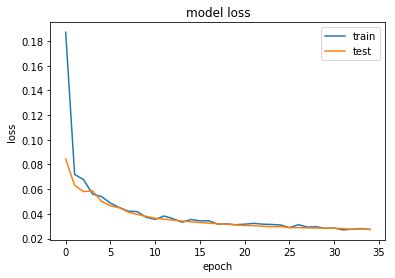

(335, 1)
(335, 1, 17)
Test RMSE: 12.914


In [90]:
history = model.fit(train_X, train_y, epochs=35, batch_size=30, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
print(yhat.shape)
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 17))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -14:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -14:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

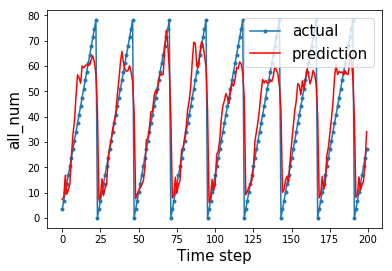

In [91]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('all_num', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()